In [2]:
import pandas as pd

In [3]:
import warnings
warnings.simplefilter("ignore")

import konlpy
konlpy.__version__

'0.5.1'

In [4]:
from konlpy.tag import Okt
okt = Okt() # 객체 생성

In [5]:
from konlpy.tag import Twitter 
from collections import Counter

In [6]:
#final = pd.read_csv('./title_전처리.csv', names =['f_title'])
winter = pd.read_csv('./data/winter.csv')

FileNotFoundError: [Errno 2] File b'./data/winter.csv' does not exist: b'./data/winter.csv'

In [193]:
winter.columns

Index(['year', 'month', 'week', 'rank', 'song_id', 'title', 'like', 'reply',
       'genre', 'artist_id', 'artist', 'fan', 'album_id', 'album',
       'album_release_date', 'album_reply', 'album_score', 'album_score_count',
       '키즈', 'POP', '국내뮤지컬', '국외영화', '발라드', '크로스오버', 'EDM', '랩/힙합', '국내영화',
       '애시드/퓨전/팝', '댄스', 'JPOP', '인디음악', '일렉트로니카', '성인가요', 'R&B/Soul', '재즈',
       '록/메탈', '클래식', '애니메이션/웹툰', '만화', '게임', '뉴에이지', '국내드라마', '포크/블루스',
       'main_genre', 'season'],
      dtype='object')

In [194]:
winter

,year,month,week,rank,song_id,title,like,reply,genre,artist_id,...,록/메탈,클래식,애니메이션/웹툰,만화,게임,뉴에이지,국내드라마,포크/블루스,main_genre,season
0,2010,1,01.03~01.09,1,2511561,우리 사랑하게 됐어요.,22821.0,57.0,['댄스'],"[428821, 434621]",...,False,False,False,False,False,False,False,False,댄스,winter
1,2010,1,01.03~01.09,2,2366796,너 때문에,16297.0,32.0,['댄스'],[322666],...,False,False,False,False,False,False,False,False,댄스,winter
2,2010,1,01.03~01.09,3,2371262,Bo Peep Bo Peep,8887.0,41.0,['댄스'],[412000],...,False,False,False,False,False,False,False,False,댄스,winter
3,2010,1,01.03~01.09,4,2425271,오늘 헤어졌어요,59736.0,54.0,['발라드'],[203912],...,False,False,False,False,False,False,False,False,발라드,winter
4,2010,1,01.03~01.09,5,2517998,처음처럼 그때처럼 (Feat. 강민경 From Davichi),8217.0,8.0,['발라드'],[58793],...,False,False,False,False,False,False,False,False,발라드,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12394,2019,2,02.25~03.03,96,3087601,Bohemian Rhapsody (2011 Remaster),101269.0,539.0,['록/메탈'],['103964'],...,True,False,False,False,False,False,False,False,록/메탈,winter
12395,2019,2,02.25~03.03,97,31575356,Heu ! (Full Ver.),43003.0,472.0,['랩/힙합'],['695757'],...,False,False,False,False,False,False,False,False,랩/힙합,winter
12396,2019,2,02.25~03.03,98,31399726,Gravity,98460.0,702.0,['댄스'],['724619'],...,False,False,False,False,False,False,False,False,댄스,winter
12397,2019,2,02.25~03.03,99,31603741,WANT,31844.0,662.0,['댄스'],['629371'],...,False,False,False,False,False,False,False,False,댄스,winter


# feat 빼주기

In [195]:
title = winter['title'].apply(lambda x: x.split('(Feat.')[0].split('(feat.')[0].split('(Prod.')[0].split('(prod.')[0].split('(With')[0].split('(Sung')[0].split('(Clean')[0].split('(Original')[0].split('(Korean')[0].split('(BigRoom')[0].split('(Main')[0].split('(Retro')[0].split('(New')[0].split('(Sincere')[0].split('(PROD')[0].split('(Steve')[0].split('(Intro.')[0].split('(Rock')[0].split('(JTBC')[0].split('(MINO')[0].split('(답가')[0].split('(2011')[0].split('(Part')[0].split('(삼성')[0].split('(Full')[0].split('(Song')[0].split('(2019')[0].split('feat')[0].split('(Hidden')[0].split('(Duet')[0].split('(BTS')[0].split('(X1')[0].split('(Narr')[0].split('(피쳐링')[0].split('(화생방실')[0])
df = pd.DataFrame(columns = ('title', 'genre'))
df['title'] = title
df['genre'] = winter['genre']

In [196]:
title.shape

(12399,)

In [198]:
df

,title,genre
0,우리 사랑하게 됐어요.,['댄스']
1,너 때문에,['댄스']
2,Bo Peep Bo Peep,['댄스']
3,오늘 헤어졌어요,['발라드']
4,처음처럼 그때처럼,['발라드']
...,...,...
12394,Bohemian Rhapsody,['록/메탈']
12395,Heu !,['랩/힙합']
12396,Gravity,['댄스']
12397,WANT,['댄스']


In [199]:
# df.to_csv('순위중복허용_전처리완료.csv', index = False)

In [200]:
df2 = df['title']

In [201]:
df2.to_csv('겨울_중복허용.txt', index = False)

# 제목은 unique하게 한번만 나오게

In [202]:
df = df.reset_index()

In [203]:
df_dup = df.drop_duplicates(subset='title', keep='first')

In [204]:
df_dup = df_dup.drop(columns='index')

In [205]:
df_dup

,title,genre
0,우리 사랑하게 됐어요.,['댄스']
1,너 때문에,['댄스']
2,Bo Peep Bo Peep,['댄스']
3,오늘 헤어졌어요,['발라드']
4,처음처럼 그때처럼,['발라드']
...,...,...
12314,미운 날,['발라드']
12341,Senorita,['댄스']
12374,사랑해서 그래,['발라드']
12384,2002,['POP']


In [206]:
# df_dup.to_csv('중복제거_전처리완료.csv', index = False)

In [207]:
df_dup2 = df_dup['title']

In [208]:
df_dup2.to_csv('겨울_중복제거.txt', index = False)

# 텍스트 파일 불러오기

In [78]:
file = open('가을_중복허용.txt', 'r') 
lists = file.readlines() 
file.close() 
lists

['사랑사랑사랑\n',
 'U\n',
 '밥만 잘 먹더라\n',
 '결혼까지 생각했어\n',
 '가식걸\n',
 'Madonna\n',
 '나 이런사람이야\n',
 'Hurricane Venus\n',
 'Bad Girl Good Girl\n',
 '정신이 나갔었나봐\n',
 '난 너에게\n',
 'A\n',
 '맘마미아 \n',
 '웃음만..\n',
 '널 사랑한다\n',
 '죽을 만큼 아파서 \n',
 'Better Together\n',
 '꺼져 줄게 잘 살아 \n',
 'Lucifer\n',
 '애기야 (My Baby U)\n',
 '부치지 못한 편지\n',
 '하얀 눈물\n',
 '잔소리 \n',
 '끝까지 들어\n',
 'I`ll Be There \n',
 '사랑이 딱해 \n',
 'I My Me Mine\n',
 '그 사람\n',
 'queen\n',
 '땡땡땡\n',
 '울고 싶단 말야\n',
 'I Need A Girl \n',
 'Digital Bounce \n',
 '혼자 왔어요 (December Ver.)\n',
 '미안해 사랑해서...\n',
 '사랑을 믿어요\n',
 'Game\n',
 '3년이 지났어\n',
 '고백하던 날\n',
 '마법소녀 (魔法少女)\n',
 '바람필래\n',
 '삐리빠빠\n',
 '키스해줄래\n',
 '여자라서\n',
 '사랑해서 사랑해서\n',
 '사랑아 (`제빵왕 김탁구` 삽입곡)\n',
 '미치겠다 \n',
 '샤랄라\n',
 '2Me (투미)\n',
 '투게더\n',
 '믿어줄래 \n',
 '...하다가\n',
 '못난 남자야\n',
 '오늘밤 \n',
 '둘이 하나 (Love Theme) \n',
 'Thank You\n',
 '여우비\n',
 'Push Push (푸시 푸시)\n',
 '시간이 지나면\n',
 'Birthday (Radio Ver.) \n',
 'DJ Got Us Fallin` In Love \n',
 '나의 옛날이야기 \n',
 'Love The Way You Lie \n',
 '오

# 형태소 나누기

In [79]:
twitter = Twitter()
morphs = [] 
for sentence in lists: 
    morphs.append(twitter.pos(sentence)) 
#print(morphs)

# 명사, 형용사, 부사만 골라내기

In [80]:
noun_adj_adv_list=[] 
for sentence in morphs : 
    for word, tag in sentence : 
        if tag in ['Noun'] and ("것" not in word) and ("내" not in word)and ("나" not in word)and ("수"not in word) and("게"not in word)and("말"not in word): 
            noun_adj_adv_list.append(word) 
            
print(noun_adj_adv_list)


['사랑', '사랑', '사랑', '밥', '결혼', '생각', '가식', '걸', '사람', '정신', '난', '너', '맘마미아', '웃음', '널', '사랑', '죽', '만큼', '줄', '살', '애기야', '못', '편지', '눈물', '잔소리', '끝', '사랑', '그', '사람', '땡땡', '땡', '울', '혼자', '사랑', '사랑', '고백', '날', '마법소녀', '바람', '필', '삐리빠빠', '키스', '여자라서', '사랑', '사랑', '사랑', '제빵', '김탁구', '삽입곡', '투', '못', '남자', '오늘밤', '둘', '여우비', '푸시', '푸시', '시간', '옛날이야기', '오', '여신', '고래', '애인', '생기', '일', '별', '너', '때문', '사랑', '빛', '너', '너', '사랑', '아픔', '사랑', '사람', '미호', '날', '연인', '선언', '사랑', '시간', '마', '너', '린다', '놈', '고백', '왜', '사랑', '사랑', '사랑', '가식', '걸', '결혼', '생각', '밥', '사람', '정신', '난', '너', '맘마미아', '웃음', '널', '사랑', '죽', '만큼', '너', '린다', '못', '편지', '줄', '살', '애기야', '그대', '눈물', '잔소리', '키스', '그', '사람', '오', '여신', '투', '사랑', '아야', '끝', '땡땡', '땡', '혼자', '난', '사랑', '울', '사랑', '사랑', '고백', '날', '못', '남자', '비예', '비요', '마법소녀', '바람', '필', '기분', '사랑', '제빵', '김탁구', '삽입곡', '이', '뭐', '삐리빠빠', '여자라서', '여자', '사랑', '사랑', '여우비', '사랑', '저', '빛', '전화', '좀', '후회', '왕', '오늘밤', '둘', '푸시', '푸시', '너', '때문', '시간', '애인', '생기', 

# 빈도수대로 정렬하기

In [81]:
count = Counter(noun_adj_adv_list)

In [82]:
words = dict(count.most_common())

In [83]:
words

{'사랑': 784,
 '너': 473,
 '그대': 219,
 '밤': 210,
 '그': 137,
 '사람': 128,
 '우리': 112,
 '날': 108,
 '이별': 103,
 '오늘': 93,
 '이': 87,
 '가을': 74,
 '니': 69,
 '남자': 68,
 '여자': 68,
 '못': 65,
 '시간': 65,
 '널': 60,
 '안녕': 60,
 '다시': 60,
 '연애': 60,
 '끝': 59,
 '노래': 59,
 '비': 59,
 '모든': 59,
 '눈물': 58,
 '가슴': 58,
 '그때': 57,
 '길': 56,
 '눈': 56,
 '뭐': 52,
 '편지': 51,
 '또': 51,
 '마음': 51,
 '하늘': 47,
 '바람': 44,
 '일': 44,
 '꽃': 44,
 '난': 42,
 '별': 42,
 '속': 42,
 '놈': 41,
 '왜': 40,
 '곡': 40,
 '넌': 39,
 '봄날': 39,
 '걸': 38,
 '하루': 38,
 '해': 37,
 '네': 37,
 '기억': 36,
 '안부': 35,
 '그땐': 34,
 '새': 34,
 '어디': 33,
 '꿈': 33,
 '잠': 33,
 '생각': 32,
 '처음': 32,
 '줄': 31,
 '맛': 30,
 '순간': 30,
 '제': 29,
 '고백': 28,
 '여름': 28,
 '중': 28,
 '건': 28,
 '지금': 27,
 '봄': 27,
 '여름밤': 27,
 '야생화': 27,
 '선물': 26,
 '입술': 26,
 '달라': 26,
 '마지막': 26,
 '뚜': 26,
 '매일': 25,
 '오빠': 25,
 '집': 25,
 '맘': 25,
 '가끔': 25,
 '위해': 25,
 '살': 24,
 '달': 24,
 '시': 23,
 '썸': 23,
 '우주': 23,
 '사이': 22,
 '때': 22,
 '입': 22,
 '한번': 22,
 '제일': 22,
 '겁': 22,
 '양화대교': 2

# 중복 단어 제거

In [84]:
del words['너']
del words['그대']
del words['사랑']
del words['사람']

# 워드 클라우드 만들기

In [85]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt

import nltk 
from nltk.corpus import stopwords

In [86]:
%matplotlib inline 
import matplotlib
from IPython.display import set_matplotlib_formats 
matplotlib.rc('font',family = 'Malgun Gothic') 

set_matplotlib_formats('retina') 
matplotlib.rc('axes',unicode_minus = False)


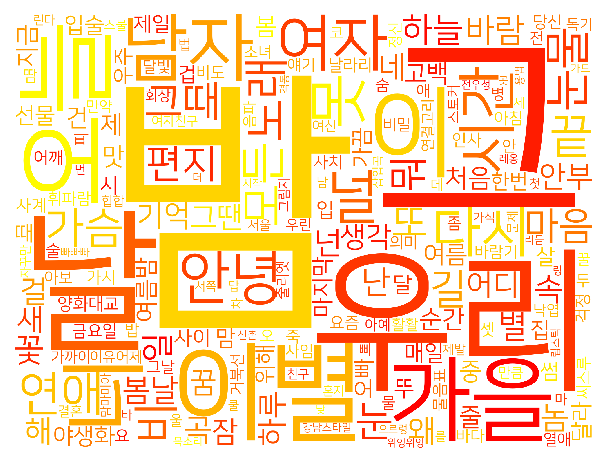

In [87]:
wordcloud = WordCloud(font_path = '/Users/yaein/Library/Fonts/NanumSquareOTFRegular.otf', background_color='white',colormap = "autumn", width=2000, height=1500).generate_from_frequencies(words) 

plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

# 이미지를 입혀보아요

In [33]:
from PIL import Image
import numpy as np

In [34]:
alice_mask = np.array(Image.open("./alice_mask.png"))

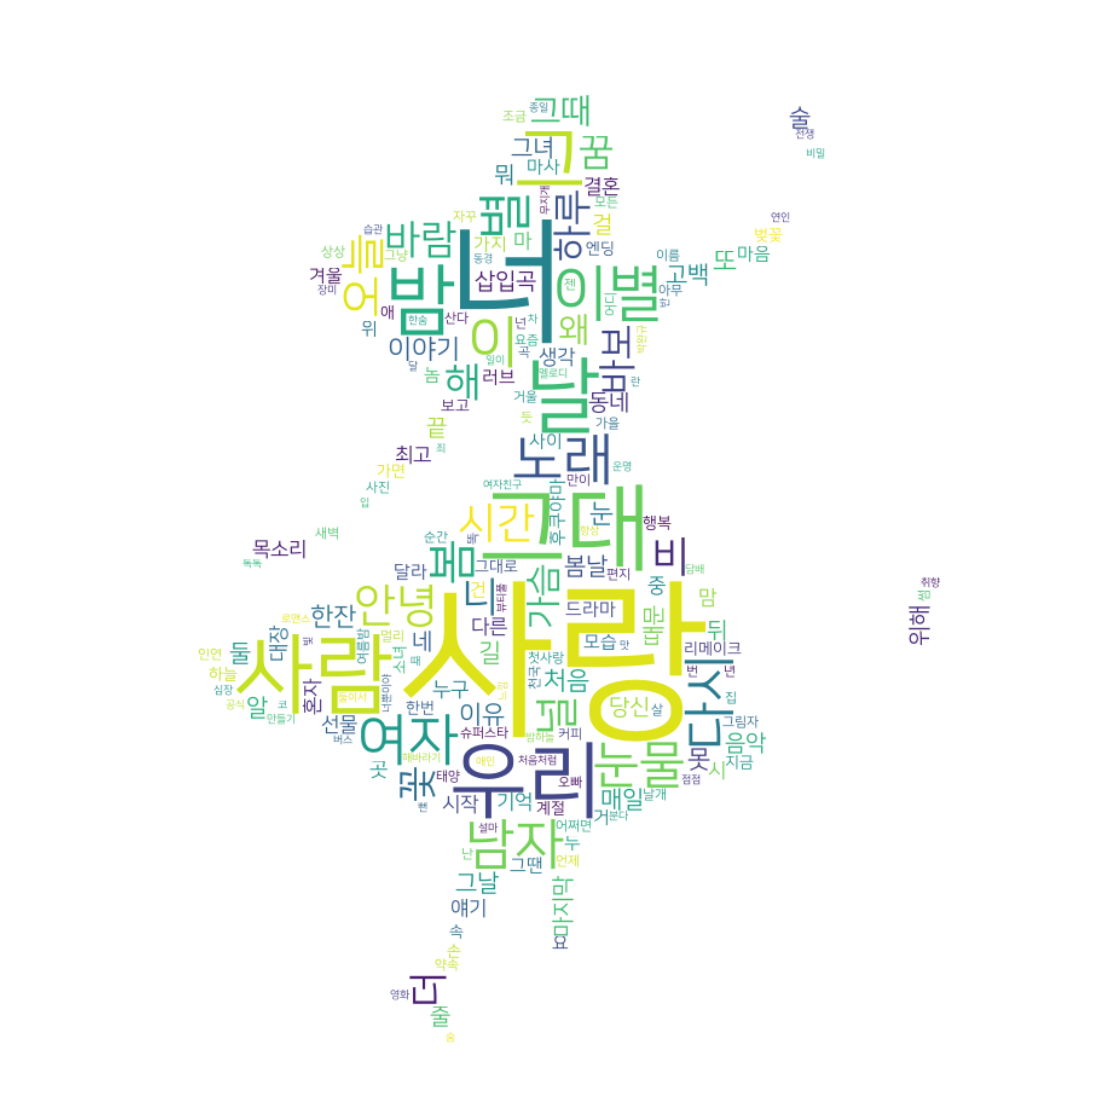

In [35]:
wordcloud = WordCloud(
    font_path = '/Users/yaein/Library/Fonts/NanumSquareOTFRegular.otf',             
    width = 800,
    height = 800,
    background_color="white",
    mask = alice_mask
).generate_from_frequencies(words) 

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()